In [35]:
# Import libraries
import numpy as np
import nmrformd as nmrmd
import MDAnalysis as mda
from MDAnalysis.analysis.rdf import InterRDF
from scipy.special import sph_harm

In [36]:
# For figure plotting
import sys
from matplotlib import pyplot as plt
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})
msize = 5
fontsize = 30
font = {'family': 'sans', 'color':  'black', 'weight': 'normal', 'size': fontsize}
myblue_light = [42/ 255, 99/255, 255/ 255] # [0/ 255, 150/255, 177/ 255]
myblue_dark = [43/ 255, 140/255, 238/ 255] # [0/ 255, 150/255, 177/ 255]
myred= [244/ 255, 143/255, 97/ 255] # [255/ 255, 77/255, 77/ 255]
mygreen = [122/255, 190/255, 165/255]
lightgray = [0.1, 0.1, 0.1]
darkgray = [0.9, 0.9, 0.9]
white = [0, 0, 0]
black = [1, 1, 1]
sys.path.append('../../shared/')
from tools import figure_improvement, save_figure

# Path to data
datapath = "../../raw-data/HEWL-in-water/"

alpha_m = [np.sqrt(16 * np.pi / 5), np.sqrt(8 * np.pi / 15), np.sqrt(32 * np.pi / 15)]

In [37]:
for T in [300]:
    u = mda.Universe(datapath+"T"+str(T)+"K/conf.gro")
    mass_oxy_water = np.sum(u.select_atoms("name OW").atoms.masses)
    mass_hyf_water = np.sum(u.select_atoms("name HW1 HW2").atoms.masses)*2 # assume is deuterated
    mass_water = mass_oxy_water+mass_hyf_water

    mass_water *= 2567 / 10636

    for name in np.unique(u.atoms.names):
        all_name = ' '
        for name in np.unique(u.atoms.names):
            if (name != 'OH') & (name != 'HW2') & (name != 'HW1'):
                all_name += name + ' '
        protein = u.select_atoms('name '+all_name)
        mass_protein = np.sum(protein.atoms.masses)

    print("g(D20) / g(HEWL + D20) =", np.round(mass_water / (mass_protein + mass_water),2), " -- exp = 0.22")

g(D20) / g(HEWL + D20) = 0.18  -- exp = 0.22


0.0 0.0


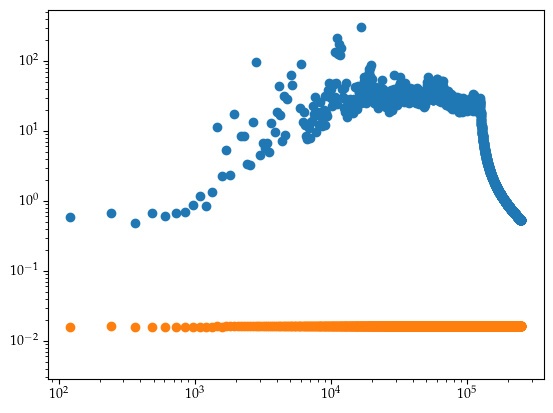

0.01 0.01


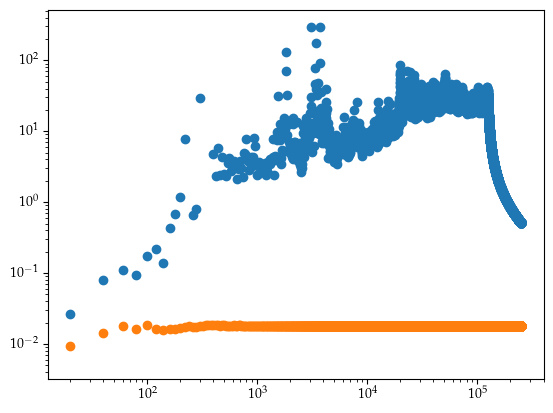

In [38]:
for T in [250, 300]:
    u = mda.Universe(datapath+"T"+str(T)+"K/conf_dry.gro", datapath+"T"+str(T)+"K/prod.xtc")
    all_name = ' '
    for name in np.unique(u.atoms.names):
        if (name[0] == 'H') & (name != 'HW2') & (name != 'HW1'):
            all_name += name + ' '
    hydrogen_protein = u.select_atoms('name '+all_name)

    nmr_result = nmrmd.NMR(u, hydrogen_protein, number_i=20)

    print(np.round(nmr_result.T1, 2), np.round(nmr_result.T2, 2))

    plt.loglog(nmr_result.f, 1/nmr_result.R1, 'o')
    plt.loglog(nmr_result.f, 1/nmr_result.R2, 'o')

    plt.show()

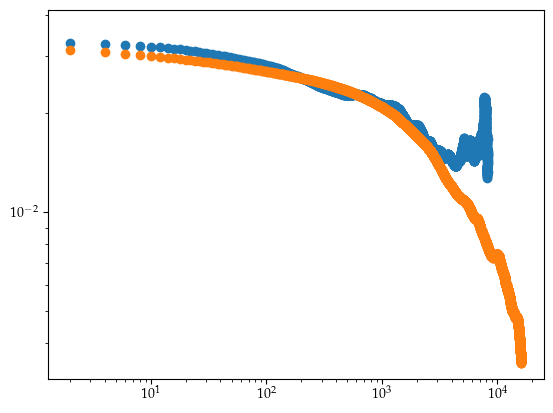

In [49]:
for T in [250, 300]:
    u = mda.Universe(datapath+"T"+str(T)+"K/conf_dry.gro", datapath+"T"+str(T)+"K/prod.xtc")
    all_name = ' '
    for name in np.unique(u.atoms.names):
        if (name[0] == 'H') & (name != 'HW2') & (name != 'HW1'):
            all_name += name + ' '
    hydrogen_protein = u.select_atoms('name '+all_name)

    nmr_result = nmrmd.NMR(u, hydrogen_protein, number_i=20)

    plt.loglog(nmr_result.t[:8000], nmr_result.gij[0][:8000], 'o')